In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,10)
import pandas as pd
from numpy.core.fromnumeric import shape

In [2]:
kernal=np.ones((2,2))
def dis(x1,x2,y1,y2):
    return sqrt(((x1-x2)**2)+((y1-y2)**2))
def empty(*arg):
    pass
def getcountour(img,imgContour):
    global a
    countours,hierarchy=cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
#     cv2.drawContours(imgContour,countours,-1,(255,0,255),5)
#     a=countours
    for cnt in countours:
        if len(cnt)>0:
            area=cv2.contourArea(cnt)
            if area>10:
                a.append(cnt)
                print('a')
                cv2.drawContours(imgContour,cnt,-1,(255,0,255),1)
#             peri=cv2.arcLength(cnt,True)
#             approx=cv2.approxPolyDP(cnt,0.02*peri,True)
#             print(approx)
#             x,y,w,h=cv2.boundingRect(approx)
#             cv2.rectangle(imgContour,(x,y),(x+w,y+h),(255,255,0),5)
#             cv2.putText(imgContour,'Points:'+ str(len(approx)),(x+w+20,y+20),cv2.FONT_HERSHEY_COMPLEX,2,(0,255,255))
#             cv2.putText(imgContour,'Area:'+ str(int(area)),(x+w-20,y-45),cv2.FONT_HERSHEY_COMPLEX,2,(255,255,255))

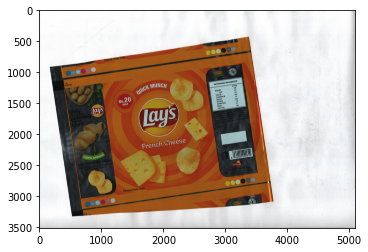

In [3]:
img=cv2.imread('1.jpg')
# img=img[80:420:,190:380]
plt.imshow(img[:,:,::-1])

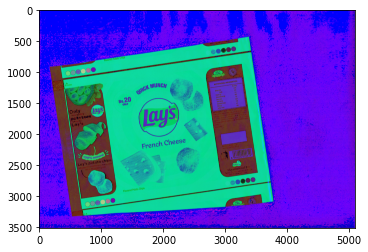

In [4]:
hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
plt.imshow(hsv)

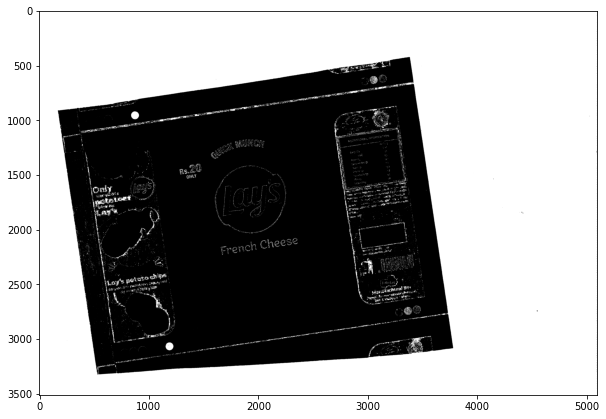

In [233]:
mask_image=cv2.inRange(hsv,np.array((0,0,0)),np.array((255,25,255)))
plt.imshow(mask_image,cmap='gray')

In [234]:
# gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# edges= cv2.Canny(gray,30,200)

# contours, hierarchy= cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# cv2.drawContours(image, contours, -1, (0,255,0),3)

# cv2.imshow('All Contours', image)


In [235]:
# plt.imshow(mask_image,cmap='gray')
# imgblack=np.zeros(shape(img))
# for i in range(np.shape(img)[0]):
#     for j in range(np.shape(img)[1]):
#         if mask_image[i][j]==0:
            
#             imgblack[i][j]=255
#         elif mask_image[i][j]==255:
#             imgblack[i][j]=0
# mask_image=imgblack

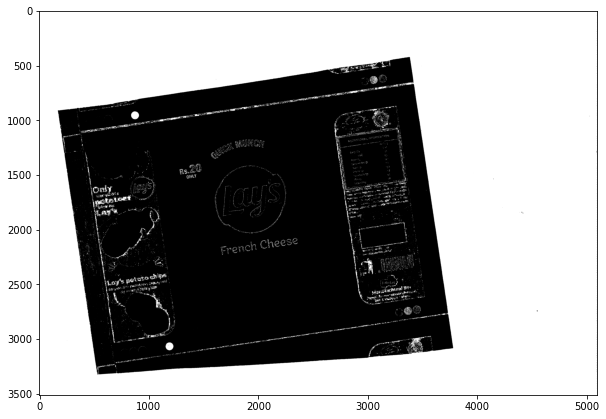

In [236]:
plt.imshow(mask_image,cmap='gray')

In [237]:
contour,hierarchy=cv2.findContours(mask_image,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
contour=sorted(contour,key=lambda x:cv2.contourArea(x),reverse=True)

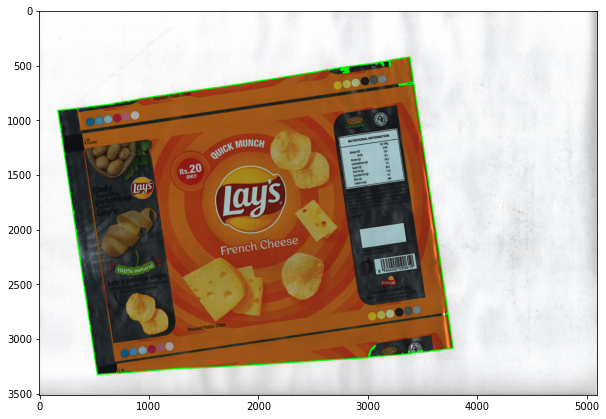

In [240]:
a=[]
# print(len(contour))
for cnt in contour[1:2]:
#     print(len(cnt))
#     print(cv2.boundingRect(contour[0]))
#     (x,y,w,h)=cv2.boundingRect(cnt)
#     cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    area=cv2.contourArea(cnt)
#     if area>30000:
    if area>4:
#         print(area)
        a.append(cnt)
        cv2.drawContours(img, cnt, -1, (0, 255, 0), 10)
plt.imshow(img[:,:,::-1])

In [241]:
a

[array([[[3375,  429]],
 
        [[3376,  428]],
 
        [[3377,  428]],
 
        ...,
 
        [[3373,  430]],
 
        [[3374,  430]],
 
        [[3375,  430]]], dtype=int32)]

In [242]:
df_3=pd.DataFrame(columns=['X_cordinates','Y_cordinates'])
for i in a[0]:
    for j in i:
        (x,y)=j
        df_3.loc[len(df_3.index)] = [int(x),int(y)]

In [243]:
df_3

X_cordinates  Y_cordinates
0              3375           429
1              3376           428
2              3377           428
3              3378           428
4              3379           428
...             ...           ...
13938          3371           430
13939          3372           430
13940          3373           430
13941          3374           430
13942          3375           430

[13943 rows x 2 columns]

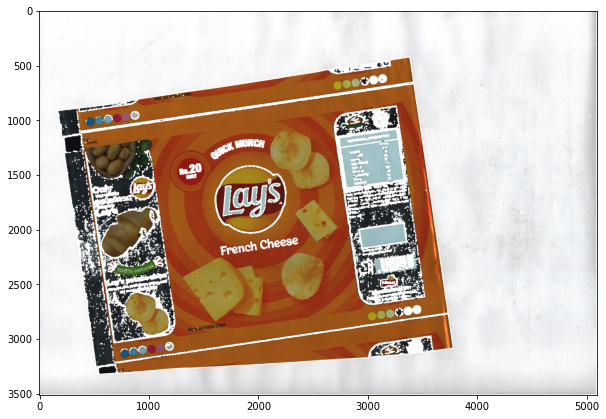

In [76]:
cv2.drawContours(img,contour, -1, (255, 255, 255), 10)
plt.imshow(img[:,:,::-1])

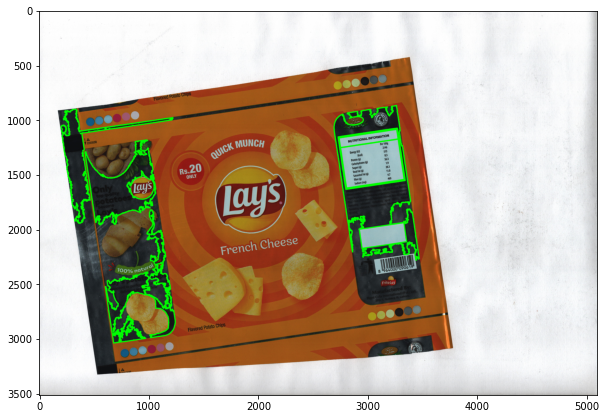

In [77]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,10)
import pandas as pd
from numpy.core.fromnumeric import shape
# getcountour(img,mask_image)
img=cv2.imread('1.jpg')
# img=img[80:420:,190:380]
plt.imshow(img[:,:,::-1])
hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
plt.imshow(hsv)
mask_image=cv2.inRange(hsv,np.array((0,0,0)),np.array((180,255,40)))
plt.imshow(mask_image,cmap='gray')
# ([0,0,0],[180, 255, 40])
contour,hierarchy=cv2.findContours(mask_image,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
contour=sorted(contour,key=lambda x:cv2.contourArea(x),reverse=True)
a=[]
# print(len(contour))
for cnt in contour:
#     print(len(cnt))
#     print(cv2.boundingRect(contour[0]))
#     (x,y,w,h)=cv2.boundingRect(cnt)
#     cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    area=cv2.contourArea(cnt)
#     if area>30000:
    if (area>40000) & (area<1400000):
#         print(area)
#         a.append(cnt)
        cv2.drawContours(img, cnt, -1, (0, 255, 0), 10)
plt.imshow(img[:,:,::-1])

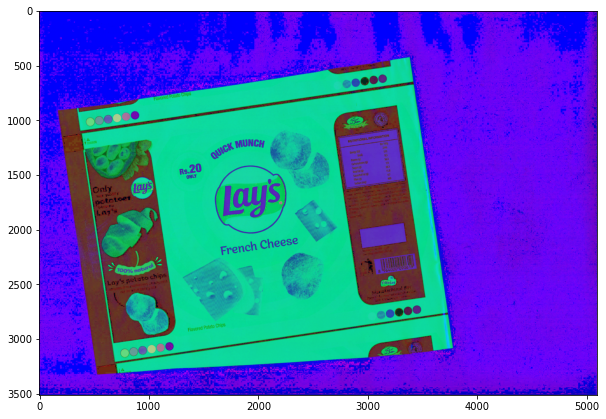

In [78]:
img=cv2.imread('1.jpg')
# img=img[80:420:,190:380]
plt.imshow(img[:,:,::-1])
hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
plt.imshow(hsv)

In [104]:
import ipywidgets.widgets as widgets
h=widgets.IntRangeSlider(
    value=[0, 180],
    min=0,
    max=255,
    step=1,
    description='HUE:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    
)
s=widgets.IntRangeSlider(
    value=[0, 255],
    min=0,
    max=255,
    step=1,
    description='Seturation:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    
)

v=widgets.IntRangeSlider(
    value=[0, 20],
    min=0,
    max=255,
    step=1,
    description='Brightness:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    
)


# Area=widgets.IntRangeSlider(
#     value=[0, 40],
#     min=0,
#     max=1000,
#     step=1,
#     description='Area:',
#     disabled=False,
#     continuous_update=False,
#     orientation='horizontal',
#     readout=True,
#     readout_format='d',
    
# )


In [151]:
a=[]
# widgets.interact(mask,h=h,s=s,v=v)
def mask(h=(0,255),s=(0,255),v=(0,200)):
    img=cv2.imread('1.jpg')
    global mask_image
    global a
    mask_image=cv2.inRange(hsv,np.array((h[0],s[0],v[0])),np.array((h[1],s[1],v[1])))
    plt.imshow(mask_image,cmap='gray')
#     plt.imshow(cv2.cvtColor(mask_image,cv2.COLOR_BGR2RGB))
    contour,hierarchy=cv2.findContours(mask_image,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
    contour=sorted(contour,key=lambda x:cv2.contourArea(x),reverse=True)
#     cv2.drawContours(img, cnt, -1, (0, 255, 0), 10)
    print(len(contour))
#     a=[]
# print(len(contour))
    for cnt in contour[:2]:
#     print(len(cnt))
#     print(cv2.boundingRect(contour[0]))
#     (x,y,w,h)=cv2.boundingRect(cnt)
#     cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        area=cv2.contourArea(cnt)
        if area>350:
#         if (area>Area[0]) & (area<Area[1]):
#         print(area)
            a.append(cnt)
            cv2.drawContours(img, cnt, -1, (0, 255, 0), 10)
    plt.imshow(img[:,:,::-1])
#     return mask_image
#     cv2.imwrite('mask.png',cv2.cvtColor(mask_image,cv2.COLOR_BGR2RGB))

In [152]:
widgets.interact(mask,h=h,s=s,v=v)

interactive(children=(IntRangeSlider(value=(0, 180), continuous_update=False, description='HUE:', max=255), In…

<function __main__.mask(h=(0, 255), s=(0, 255), v=(0, 200))>

In [181]:
a

[array([[[ 353, 1133]],
 
        [[ 352, 1134]],
 
        [[ 351, 1134]],
 
        ...,
 
        [[ 356, 1133]],
 
        [[ 355, 1133]],
 
        [[ 354, 1134]]], dtype=int32),
 array([[[ 696, 3234]],
 
        [[ 695, 3235]],
 
        [[ 694, 3235]],
 
        ...,
 
        [[ 699, 3234]],
 
        [[ 698, 3234]],
 
        [[ 697, 3234]]], dtype=int32)]

In [189]:
# df_1=pd.DataFrame(columns=['X_cordinates','Y_cordinates'])
# for i in a[1]:
# #     print(i)
#     for j in i:
        
#         (x,y)=j
# #         print(y)
#         df_1.loc[len(df_1.index)] = [int(x),int(y)]
# df_1

X_cordinates  Y_cordinates
0              696          3234
1              695          3235
2              694          3235
3              693          3235
4              692          3235
...            ...           ...
1787           701          3234
1788           700          3234
1789           699          3234
1790           698          3234
1791           697          3234

[1792 rows x 2 columns]

In [190]:
df_1=pd.DataFrame(columns=['X_cordinates','Y_cordinates'])
for i in a[1]:
    for j in i:
        (x,y)=j
        df_1.loc[len(df_1.index)] = [int(x),int(y)]
df=pd.DataFrame(columns=['X_cordinates','Y_cordinates'])
df
for i in a[0]:
    for j in i:
        (x,y)=j
        df.loc[len(df.index)] = [int(x),int(y)]

In [191]:
df_1

X_cordinates  Y_cordinates
0              696          3234
1              695          3235
2              694          3235
3              693          3235
4              692          3235
...            ...           ...
1787           701          3234
1788           700          3234
1789           699          3234
1790           698          3234
1791           697          3234

[1792 rows x 2 columns]

In [192]:
df.X_cordinates.min()

218

In [193]:
df[df.X_cordinates==218]

X_cordinates  Y_cordinates
171           218          1153

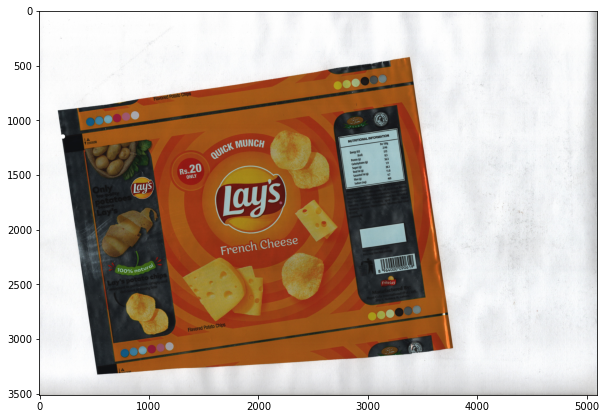

In [194]:
img=cv2.imread('1.jpg')
cv2.circle(img,(218,1153),20,(255,255,255),-1)
plt.imshow(img[:,:,::-1])

In [195]:
df_1.X_cordinates.min()

535

In [199]:
df_1[df_1.X_cordinates==535]

X_cordinates  Y_cordinates
229           535          3259

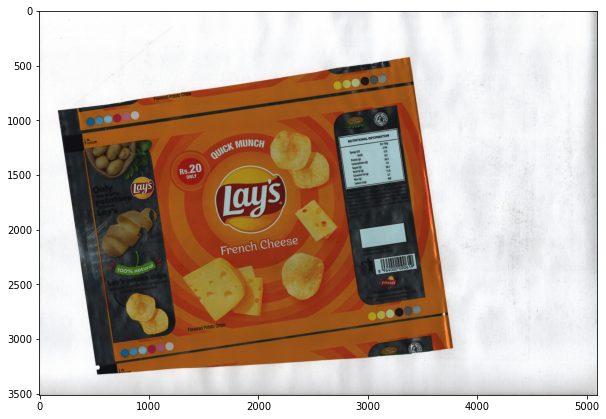

In [201]:
img=cv2.imread('1.jpg')
cv2.circle(img,(535,3259),20,(255,255,255),-1)
plt.imshow(img[:,:,::-1])

X_cordinates  Y_cordinates
0              696          3234
1              695          3235
2              694          3235
3              693          3235
4              692          3235
...            ...           ...
1787           701          3234
1788           700          3234
1789           699          3234
1790           698          3234
1791           697          3234

[1792 rows x 2 columns]

In [255]:
# base=sqrt(((int(x1)-int(x2))**2)+((int(y1)-int(y2))**2))
# hype=sqrt(((int(x1)-int(x2))**2)+((int(y1)-int(y2))**2))
height=int(535)-int(218)
base=int(3259)-int(1153)

6.643533123028392

In [258]:
from math import atan,degrees
theta=atan(height/base)
# theta= degrees(theta)
theta

0.14940073208366147

In [245]:
df_3.X_cordinates.max()

3785

In [272]:
df_4=df_3[df_3.Y_cordinates==1153]

In [276]:
from math import cos,sqrt
actual_len=abs(218-3499)/cos(theta)
actual_len

3317.960574900822

In [278]:
df_3['angel']=sqrt(((int(218)-int(df_3.X_cordinates))**2)+((int(1153)-int(df_3.Y_cordinates))**2))

TypeError: cannot convert the series to <class 'int'>

In [274]:
df_3

X_cordinates  Y_cordinates        angel
0              3375           429  3317.960575
1              3376           428  3317.960575
2              3377           428  3317.960575
3              3378           428  3317.960575
4              3379           428  3317.960575
...             ...           ...          ...
13938          3371           430  3317.960575
13939          3372           430  3317.960575
13940          3373           430  3317.960575
13941          3374           430  3317.960575
13942          3375           430  3317.960575

[13943 rows x 3 columns]

In [279]:
import imutils

In [282]:
rot=imutils.rotate(img,angle=degrees(-theta))

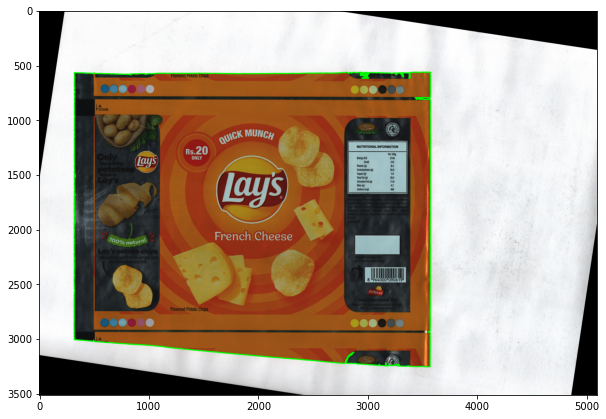

In [283]:
plt.imshow(rot[:,:,::-1])

In [ ]:
imgBlur=cv2.GaussianBlur(frame,(7,7),0)
imgGray=cv2.cvtColor(imgBlur,cv2.COLOR_BGR2GRAY)
imgCanny=cv2.Canny(imgGray,cv2.getTrackbarPos('thr1','th'),cv2.getTrackbarPos('thr2','th'))
imgdilation=cv2.dilate(imgCanny,kernel=kernal,iterations=1)
getcountour(imgdilation,imgContour)

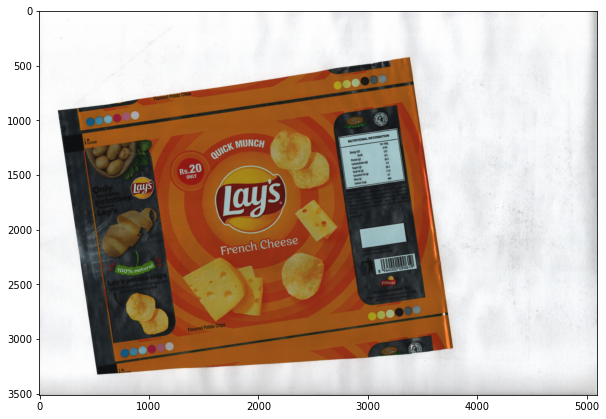

In [53]:
imgBlur=cv2.GaussianBlur(img,(7,7),0)
plt.imshow(imgBlur[:,:,::-1])

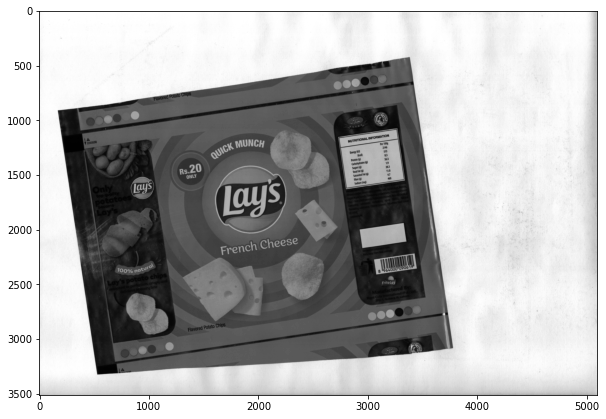

In [54]:
imgGray=cv2.cvtColor(imgBlur,cv2.COLOR_BGR2GRAY)
plt.imshow(imgGray,cmap='gray')

In [11]:
import ipywidgets.widgets as widgets
h=widgets.IntSlider(
    value=90,
    min=0,
    max=255,
    step=1,
    description='HUE:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    
)
s=widgets.IntSlider(
    value=90,
    min=0,
    max=255,
    step=1,
    description='Seturation:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    
)

In [12]:
def empty():
    pass

In [16]:
def canny(h=90,s=90):
    global imgCanny
    imgCanny=cv2.Canny(imgGray,h,s)
    plt.imshow(imgCanny,cmap='gray')
#     return mask_image
#     cv2.imwrite('mask.png',cv2.cvtColor(mask_image,cv2.COLOR_BGR2RGB))

In [17]:
widgets.interact(canny,h=h,s=s)

interactive(children=(IntSlider(value=90, continuous_update=False, description='HUE:', max=255), IntSlider(val…

<function __main__.canny(h=90, s=90)>

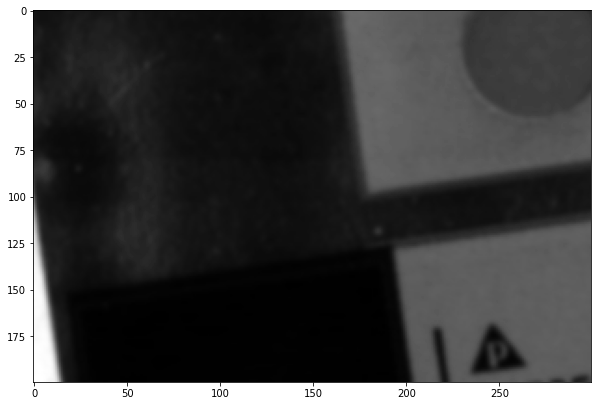

In [61]:
imgGray=cv2.cvtColor(imgBlur,cv2.COLOR_BGR2GRAY)
plt.imshow(imgGray[1000:1200,200:500],cmap='gray')

In [22]:
shape(imgGray)

(3510, 5100)

In [35]:
imgblack=np.oness(shape(imgGray))*255
for i in range(np.shape(img)[0]):
    for j in range(np.shape(img)[1]):
        if imgGray[i][j]!=0:
            imgblack[i][j]=255

AttributeError: module 'numpy' has no attribute 'oness'

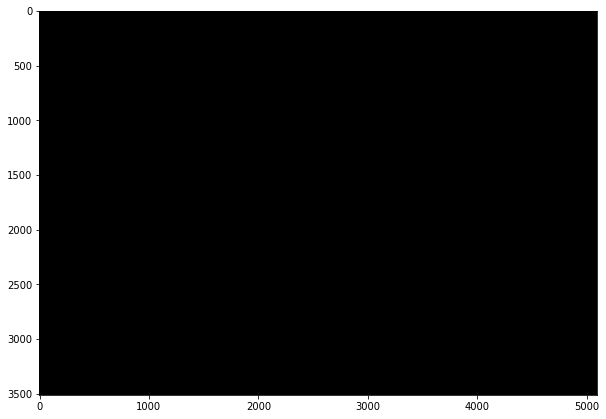

In [38]:
imgblack=np.zeros(shape(imgGray))
# imgblack[:,:]=255
plt.imshow(imgblack,cmap='gray')

In [39]:
cv2.compare(imgGray,imgblack,)

error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'compare'
> Overload resolution failed:
>  - compare() missing required argument 'cmpop' (pos 3)
>  - compare() missing required argument 'cmpop' (pos 3)


In [63]:
imgGray[1000:1200,200:500]

array([[ 35,  34,  32, ...,  64,  60,  57],
       [ 35,  34,  32, ...,  66,  63,  59],
       [ 36,  34,  32, ...,  67,  66,  62],
       ...,
       [250, 251, 251, ...,  61,  70,  79],
       [250, 251, 251, ...,  57,  67,  76],
       [249, 250, 251, ...,  63,  72,  77]], dtype=uint8)

In [48]:
imgblack=imgGray
for i in range(np.shape(img)[0]):
    for j in range(np.shape(img)[1]):
        if imgGray[i][j]>50:
            imgblack[i][j]=0

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Unknown\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Unknown\AppData\Local\Temp\ipykernel_10408\1142788973.py", line -1, in <cell line: 2>
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Unknown\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 1993, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\Unknown\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\ultratb.py", line 1118, in structured_traceback
    return FormattedTB.structured_traceback(
  File "C:\Users\Unknown\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\ultratb.py", line 1012, in structured_traceback
    return Ver

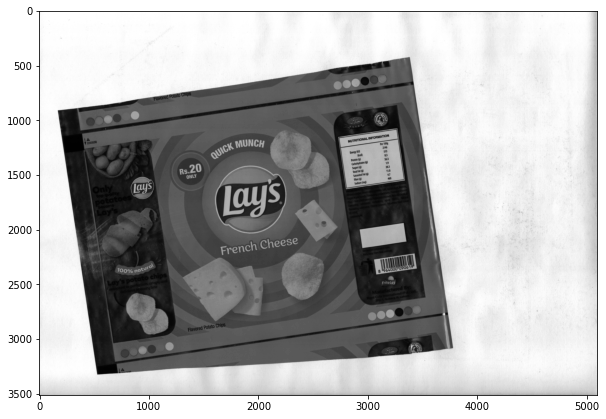

In [55]:
imgblack=imgGray
plt.imshow(imgblack,cmap='gray')

In [64]:
for i in range(np.shape(img)[0]):
    for j in range(np.shape(img)[1]):
        if imgGray[i][j]>50:
            imgblack[i][j]=0

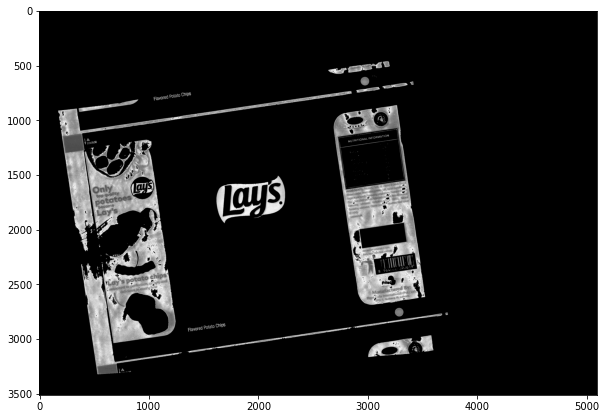

In [65]:
plt.imshow(imgblack,cmap='gray')